In [1]:
import os
import numpy as np
import pickle as pkl
from os.path import join as pjoin
from scipy.stats import pearsonr
from matplotlib import pyplot as plt
from cxy_hcp_ffa.lib.predefine import proj_dir

anal_dir = pjoin(proj_dir, 'analysis/s2/1080_fROI/refined_with_Kevin')
work_dir = pjoin(anal_dir, 'plot/tmp')
if not os.path.isdir(work_dir):
    os.makedirs(work_dir)

# 计算ROI面积和激活强度, myelin, thickness的相关

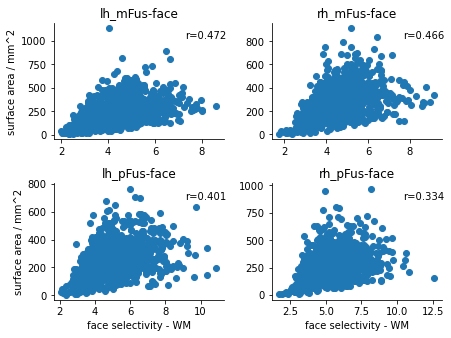

In [17]:
meas_name = 'activ_wm'  # activ_wm, activ_emo, myelin, thickness
meas2file = {
    'activ_wm': pjoin(anal_dir, 'tfMRI/individual_activ_{hemi}.pkl'),
    'activ_emo': pjoin(anal_dir, 'tfMRI/individual_activ_{hemi}_emo.pkl'),
    'myelin': pjoin(anal_dir, 'structure/rois_v3_{hemi}_myelin.pkl'),
    'thickness': pjoin(anal_dir, 'structure/rois_v3_{hemi}_thickness.pkl')
}
meas2xlabel = {
    'activ_wm': 'face selectivity - WM',
    'activ_emo': 'face selectivity - Emotion',
    'myelin': 'myelination',
    'thickness': 'thickness'
}
figsize = (6.4, 4.8)
hemis = ('lh', 'rh')
rois = ('mFus-face', 'pFus-face')

meas_file = meas2file[meas_name]
area_file = pjoin(anal_dir, 'structure/rois_v3_{hemi}_va.pkl')
# out_file = None
out_file = pjoin(work_dir, f'surface_area-corr-{meas_name}.jpg')

_, axes = plt.subplots(len(rois), len(hemis), figsize=figsize)
for hemi_idx, hemi in enumerate(hemis):
    meas_data = pkl.load(open(meas_file.format(hemi=hemi), 'rb'))
    area_data = pkl.load(open(area_file.format(hemi=hemi), 'rb'))
    for roi_idx, roi in enumerate(rois):
        ax = axes[roi_idx, hemi_idx]
        idx1 = meas_data['roi'].index(roi)
        idx2 = area_data['roi'].index(roi)
        meas = meas_data['meas'][idx1]
        area = area_data['meas'][idx2]
        non_nan_vec1 = ~np.isnan(meas)
        non_nan_vec2 = ~np.isnan(area)
        if meas_name == 'activ_emo':
            assert np.all(non_nan_vec2[non_nan_vec1])
        else:
            assert np.all(non_nan_vec1 == non_nan_vec2)
        meas = meas[non_nan_vec1]
        area = area[non_nan_vec1]
        r = pearsonr(meas, area)[0]
        ax.scatter(meas, area)
        if roi_idx == 1:
            ax.set_xlabel(meas2xlabel[meas_name])
        ax.set_title(f'{hemi}_{roi}')
        if hemi_idx == 0:
            ax.set_ylabel('surface area / mm^2')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        
        min1, max1 = np.min(meas), np.max(meas)
        min2, max2 = np.min(area), np.max(area)
        text_x = 0.8 * (max1-min1) + min1
        text_y = 0.9 * (max2-min2) + min2
        ax.text(text_x, text_y, 'r={:.3f}'.format(r))
plt.tight_layout()
if out_file is None:
    plt.show()
else:
    plt.savefig(out_file)